### **Importing Libraries**

In [108]:

# This part will import several libraries, including pandas, numpy, scikit-learn, nltk, torch, transformers, and gensim. 
# I will also sets a pandas option to display the full width of column
# Imports specific classes and functions from some libraries, such as BertModel and BertTokenizer from transformers, and Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout, and Sequential from tensorflow.keras.layers. 
# Imports a model from gensim (KeyedVectors)

import pandas as pd
import numpy as np
import os
pd.set_option('display.max_colwidth', None) #This will allow us to see the full
                                            # width of the column
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import nltk
nltk.download('stopwords')
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from termcolor import colored
from sklearn.model_selection import StratifiedShuffleSplit
import torch
!pip install transformers
import transformers
from transformers import BertModel, BertTokenizer
from sklearn.metrics import classification_report
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
from torch.utils.data import Dataset, TensorDataset
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
# This code snippet imports the warnings library and sets a filter to ignore future warnings

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [110]:
# Mount Google Drive, to access files and data stored in my Google Drive.

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### **Configuring Pathways**

In [111]:
student_id=2213409
np.random.seed(student_id)

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('./CE807/Assignment2/',str(student_id)) # Make sure to update with your student_id and student_id is an integer
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv')
print('Train file: ', train_file)

test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
print('Test file: ', train_file)


valid_file = os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
print('Valid file: ', train_file)

MODEL_1_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '1') # Model 1 directory
print('Model 1 directory: ', MODEL_1_DIRECTORY)

MODEL_2_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '2') # Model 1 directory
print('Model 2 directory: ', MODEL_1_DIRECTORY)

#This is just to show how the pathways will later on be accessed
#Taken from the example colab notebook shared to verify its working
MODEL_1_25_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'25') # Model 1 trained using 25% of train data directory
print('Model 1 directory with 25% data: ', MODEL_1_25_DIRECTORY)

MODEL_2_25_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'25') # Model 1 trained using 25% of train data directory
print('Model 1 directory with 25% data: ', MODEL_2_25_DIRECTORY)

model_1_25_output_test_file = os.path.join(MODEL_1_25_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 1 using 25% of train data: ',model_1_25_output_test_file)
# You need to do this for both models and all data sizes 

List files:  ['wiki-news-300d-1M.vec',
 'train.csv',
 'valid.csv',
 'test.csv',
 'models',
 'Text_Analytics.ipynb']
Train file:  gdrive/MyDrive/./CE807/Assignment2/2213409/train.csv
Test file:  gdrive/MyDrive/./CE807/Assignment2/2213409/train.csv
Valid file:  gdrive/MyDrive/./CE807/Assignment2/2213409/train.csv
Model 1 directory:  gdrive/MyDrive/./CE807/Assignment2/2213409/models/1
Model 2 directory:  gdrive/MyDrive/./CE807/Assignment2/2213409/models/1
Model 1 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2213409/models/1/25
Model 1 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2213409/models/2/25
Output file name using model 1 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2213409/models/1/25/output_test.csv


### Data Reading & Statistics

Here I am observing Train file's first five rows

In [112]:
train_df = pd.read_csv(train_file)
train_df.head()

,id,tweet,label
0,42884,@USER I’m done with you as well. An INTENTIONAL 11th hour attack completely based on hearsay and you want an investigation? What do you think they’ll find other than he said she said. Feinstein admitted she sat on this and here you are ready to lockstep with the swamp.,NOT
1,92152,I now have over 6k followers. Only 94k to go to get to my goal! #TrumpTrain #MAGA #KAG,NOT
2,65475,@USER Tom was bought! He is more interested in Tom than his constituents,NOT
3,22144,@USER @USER Even her brother thinks she is a monster: URL,OFF
4,81048,@USER @USER @USER @USER @USER I can understand that and if it’s someone I know I’ll debate with them but I’m not willing to spend that much time trying to change the mind of someone I don’t know I tryed that with people and gun control and it just get stupid because they won’t try to understand,OFF


Here I am checking if there is any imbalance in train_data.

In [113]:
train_df.groupby(['label']).size()

label
NOT    8221
OFF    4092
dtype: int64

Here i am observing Test file's first five rows.


In [114]:
test_df = pd.read_csv(test_file)
test_df.head()

,id,tweet,label
0,15923,"#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA Democrats Support Antifa, Muslim Brotherhood, MS13, ISIS, Pedophilia, Child Trafficking, Taxpayer Funded Abortion’s, Election Fraud, Sedition And Treason!!! #LockThemAllUp #WWG1WGA #QAnon ⁦@USER URL",OFF
1,27014,"#ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.",NOT
2,30530,"#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendment #RNC #USMC #veterans @USER @USER @USER @USER @USER #fakereporting #THESWAMP #dnc #liberals @USER @USER #fakeoutrage @USER First, it reduces the ca URL",NOT
3,13876,#Watching #Boomer getting the news that she is still up for parole always makes me smile. #Wentworth Finale...@USER is such a treasure. URL,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right in #London – #antifa #Oct13 — Enough is Enough! URL,OFF


Here I am checking if there is any imbalance in test_df.

In [115]:

test_df.groupby(['label']).size()

label
NOT    620
OFF    240
dtype: int64

Here I am observing Valid file's first five rows.

In [116]:
valid_df = pd.read_csv(valid_file)
valid_df.head()

,id,tweet,label
0,12476,@USER @USER @USER Trump is declassifying information and there is nothing you can do about it. He is NOT the subject of an investigation. The FBI and DOJ have repeatedly said as much. Go back to your quackery.,NOT
1,23242,@USER Ha even with them trying to rig the system. They had no idea about divine intervention we 🙏God answered President Trump 🇺🇸🇺🇸,NOT
2,97885,@USER @USER @USER Man you really thought this was it huh URL,NOT
3,43414,@USER Ms. Clinton - you are a class act. My response to that idiot would likely land me in twitter jail (but would totally be worth it). I hope you run for office one day.,OFF
4,81403,@USER It’s still here at 753. If someone did this to her or her family she’d be enraged. She is what @USER has let loose.,NOT


Here I am checking if there is any imbalance in valid_df.

In [117]:
valid_df.groupby(['label']).size()

label
NOT    619
OFF    308
dtype: int64

Checking splits size

In [118]:
print(len(train_df))
print(len(test_df))
print(len(valid_df))

12313
860
927


We know that in all dataset splits given to us, the data has less offensive and more not offensive tweets, with the ratio being 66.7% being not offensive text.

### Data Cleansing

Removing @USER from the text as it serves no purpose except show how many users were tagged or the users being replied to which are already anonymized and doesnt add to the text's offensiveness.

In [119]:
train_df["tweet"]=train_df["tweet"].str.replace("@USER","")

In [120]:
train_df.head(10)

,id,tweet,label
0,42884,I’m done with you as well. An INTENTIONAL 11th hour attack completely based on hearsay and you want an investigation? What do you think they’ll find other than he said she said. Feinstein admitted she sat on this and here you are ready to lockstep with the swamp.,NOT
1,92152,I now have over 6k followers. Only 94k to go to get to my goal! #TrumpTrain #MAGA #KAG,NOT
2,65475,Tom was bought! He is more interested in Tom than his constituents,NOT
3,22144,Even her brother thinks she is a monster: URL,OFF
4,81048,I can understand that and if it’s someone I know I’ll debate with them but I’m not willing to spend that much time trying to change the mind of someone I don’t know I tryed that with people and gun control and it just get stupid because they won’t try to understand,OFF
5,73339,Help help liberals... sexual assaults with facts... where are You?,NOT
6,70063,"She knows something the liberals don't want to talk about. She said Canada was at risk"" three times in the House of Commons before she crossed the aisle. Coming from someone of her background, I'd be inclineed to take the warning seriously. Call me old fashioned.""",NOT
7,80222,So the march is against antifa bigots and labour anti-semitism then? Did I get that right?,NOT
8,90554,lmao! You call this courage ? Courageous act will be she tearing apart say Quran and then you claiming she is your kind of woman ;). Majority of Hindus still don’t get offended by such acts no matter what MSM is showing these days,NOT
9,77399,LIAR!!! What supporters is she talking about??? I was embarrassed when our last president went on a world apology tour and he even bowed to them like he was their servant!!! URL,OFF


Additionally, removing 'URL' as the URL itself is not present and adds nothing of value by its own

In [121]:
train_df["tweet"]=train_df["tweet"].str.replace("URL","")

In [122]:
train_df.head(10)

,id,tweet,label
0,42884,I’m done with you as well. An INTENTIONAL 11th hour attack completely based on hearsay and you want an investigation? What do you think they’ll find other than he said she said. Feinstein admitted she sat on this and here you are ready to lockstep with the swamp.,NOT
1,92152,I now have over 6k followers. Only 94k to go to get to my goal! #TrumpTrain #MAGA #KAG,NOT
2,65475,Tom was bought! He is more interested in Tom than his constituents,NOT
3,22144,Even her brother thinks she is a monster:,OFF
4,81048,I can understand that and if it’s someone I know I’ll debate with them but I’m not willing to spend that much time trying to change the mind of someone I don’t know I tryed that with people and gun control and it just get stupid because they won’t try to understand,OFF
5,73339,Help help liberals... sexual assaults with facts... where are You?,NOT
6,70063,"She knows something the liberals don't want to talk about. She said Canada was at risk"" three times in the House of Commons before she crossed the aisle. Coming from someone of her background, I'd be inclineed to take the warning seriously. Call me old fashioned.""",NOT
7,80222,So the march is against antifa bigots and labour anti-semitism then? Did I get that right?,NOT
8,90554,lmao! You call this courage ? Courageous act will be she tearing apart say Quran and then you claiming she is your kind of woman ;). Majority of Hindus still don’t get offended by such acts no matter what MSM is showing these days,NOT
9,77399,LIAR!!! What supporters is she talking about??? I was embarrassed when our last president went on a world apology tour and he even bowed to them like he was their servant!!!,OFF


Applying the same manipulation on test and valid as coherency between sets is extremely important to maintain

In [123]:
test_df["tweet"]=test_df["tweet"].str.replace("@USER","")
test_df["tweet"]=test_df["tweet"].str.replace("URL","")

valid_df["tweet"]=valid_df["tweet"].str.replace("@USER","")
valid_df["tweet"]=valid_df["tweet"].str.replace("URL","")

Before we begin our modelling, we should also cater to the way vocabulary is currently represented, lower() to have text in similar form is a good idea to implement

In [124]:
train_df['tweet']=train_df['tweet'].apply(str.lower)
valid_df['tweet']=valid_df['tweet'].apply(str.lower)
test_df['tweet']=test_df['tweet'].apply(str.lower)

In [125]:
train_df.head(5)

,id,tweet,label
0,42884,i’m done with you as well. an intentional 11th hour attack completely based on hearsay and you want an investigation? what do you think they’ll find other than he said she said. feinstein admitted she sat on this and here you are ready to lockstep with the swamp.,NOT
1,92152,i now have over 6k followers. only 94k to go to get to my goal! #trumptrain #maga #kag,NOT
2,65475,tom was bought! he is more interested in tom than his constituents,NOT
3,22144,even her brother thinks she is a monster:,OFF
4,81048,i can understand that and if it’s someone i know i’ll debate with them but i’m not willing to spend that much time trying to change the mind of someone i don’t know i tryed that with people and gun control and it just get stupid because they won’t try to understand,OFF


From the paper linked in the instruction manual provided to us, we get this chart that shows how certain keywords are associated with Offensive as percentage

![image.png]()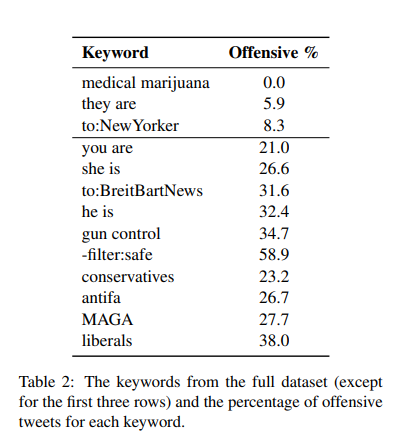

**compute_performance** is taken from the template code provided in the assignment and is used in train_method1 for computing accuracy, recall, precision and F1 Score.

**Recall**: Recall measures the completeness of positive predictions

**Precision**: Precision measures the accuracy of positive predictions

**F1-Score:** It combines the precision and recall scores of a model

**Accuracy:** A good metric for balanced datasets (TP+TN/TP+TN+FN+FP)

AUC: A good metric for when dataset is imbalanced.

In [126]:
def compute_performance(y_true, y_pred):
    """
    Prints different performance metrics like accuracy, recall (macro), precision (macro), and F1 (macro).
    Displays the confusion matrix with proper X & Y axis labels.
    Returns the F1 score.

    Args:
        y_true: Numpy array or list containing true labels.
        y_pred: Numpy array or list containing predicted labels.

    Returns:
        float: The F1 score.
    """
    # Compute performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    # Print performance metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 score: {f1:.4f}')

    # Compute and display the confusion matrix
    labels = sorted(list(set(y_true)))
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    print('\nConfusion matrix:')
    print('\t' + '\t'.join(labels))
    for i, label1 in enumerate(labels):
        row = cm[i]
        print(f'{label1}\t' + '\t'.join(str(x) for x in row))

    return f1, accuracy, precision, recall


### MODEL 1 - SVM

In this method 1 below:
-> the structure provided in the template code is used as a basis for training the first model, SVM - Support Vector Machines on a classification task with a linear kernel. It is chosen for two reasons, most papers scraped through in the first task and even in the paper linked in the assignment make use of it as it is a strong predictor and serves to break plenty of SOTA's of the past.

SVMs in general have been SOTA for a great many tasks and do offensive speech classification quite well as well. 

In the implementation below, the text is lower cased, punctuations have been removed and stop words eliminated with the help of NLTK and regex.
Finally, with TF-IDF as the basis for weighing words importance across document space i.e tweet space across rows, we find ourselves with a decent implementation below.


1-) Remove Stopwords, lower-case all words, remove punctuations and finally, tokenize

2-) Apply TF-IDF across the tweet space to create a tokenizer/feature space which is then fed to an SVM


3-) Fit an SVM model and train!

In [127]:
def train_method1(train_file, val_file, model_dir, vectorizer_type='tfidf', ngram_range=(1, 1)):
    """
     Trains an SVM model on the OLID dataset using unigrams.
     Saves the best model in the specified model directory.
     
    Args:
        train_file: Path to the training dataset file.
        val_file: Path to the validation dataset file.
        model_dir: Path to the model directory where the best model will be saved.
        vectorizer_type: Type of vectorizer to use ('count' or 'tfidf'). Default is 'tfidf'.
        ngram_range: The range of n-grams to use. Default is (1, 1) for unigrams.
    """
    # Load the training and validation datasets
    train_df = train_file
    val_df = val_file
    
    # Preprocess the text data
    train_df['tweet'] = train_df['tweet'].apply(lambda x: x.lower()) # Convert to lowercase
    train_df['tweet'] = train_df['tweet'].str.replace('[^\w\s]','') # Remove punctuation
    train_df['tweet'] = train_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in nltk.corpus.stopwords.words('english')])) # Remove stop words
    
    val_df['tweet'] = val_df['tweet'].apply(lambda x: x.lower())
    val_df['tweet'] = val_df['tweet'].str.replace('[^\w\s]','')
    val_df['tweet'] = val_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in nltk.corpus.stopwords.words('english')]))
    
    # Initialize a vectorizer
    if vectorizer_type == 'count':
        vectorizer = CountVectorizer(ngram_range=ngram_range)
    elif vectorizer_type == 'tfidf':
        vectorizer = TfidfVectorizer(ngram_range=ngram_range)
    else:
        raise ValueError('Invalid vectorizer type!')
    
    # Convert the text data into numerical features
    X_train = vectorizer.fit_transform(train_df['tweet'])
    y_train = train_df['label']
    X_val = vectorizer.transform(val_df['tweet'])
    y_val = val_df['label']
    
    # Train the SVM model
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)
    
    # Evaluate the SVM model
    y_pred = svm.predict(X_val)

    compute_performance(y_val,y_pred)
    
    # Save the vocabulary
    model_file = os.path.join(model_dir, 'vocabulary.pkl')
    with open(model_file, 'wb') as f:
        pickle.dump(vectorizer.vocabulary_, f)
    
    # Save the best model
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    model_file = os.path.join(model_dir, 'svm_unigrams.pkl')
    with open(model_file, 'wb') as f:
        pickle.dump(svm, f)

    model_file = os.path.join(model_dir, 'vectorizer.pkl')
    with open(model_file, 'wb') as f:
        pickle.dump(vectorizer, f)

This here is a neat implementation on calling the train_method1 with stratified split so as to keep the same distribution across all data splits for measuring Data Size effect later on. With splits of train_df, we will train per split and report performance metrics in the end of each run.

Model Directory is mentioned and passed to the function above and it allows for storing the final models for each split in the directory paths as directed in the assignment.

In [128]:
import random

train_sizes = [0.25, 0.5, 0.75, 1.0]
train_dfs = []

# Define the stratified splitter
splitter = StratifiedShuffleSplit(n_splits=len(train_sizes), test_size=0.2, random_state=student_id)

# Split the data using the splitter
for i, (train_idx, _) in enumerate(splitter.split(train_df, train_df["label"])):
    size = train_sizes[i]
    train_split_df = train_df.iloc[train_idx].sample(frac=size, random_state=student_id)
    train_dfs.append(train_split_df)


# Train the SVM model on each split of the training dataset
for i, train_split_df in enumerate(train_dfs):
    print('\n')
    print('Data Size:',str(int(train_sizes[i]*100))+'%')
    
    model_dir = os.path.join(MODEL_1_DIRECTORY, str(int(train_sizes[i]*100)))
    train_method1(train_split_df, valid_df, model_dir, 'tfidf',(1, 1))




Data Size: 25%
Accuracy: 0.7368
Precision: 0.7296
Recall: 0.6373
F1 score: 0.6441

Confusion matrix:
	NOT	OFF
NOT	578	41
OFF	203	105


Data Size: 50%
Accuracy: 0.7616
Precision: 0.7526
Recall: 0.6804
F1 score: 0.6939

Confusion matrix:
	NOT	OFF
NOT	571	48
OFF	173	135


Data Size: 75%
Accuracy: 0.7573
Precision: 0.7417
Recall: 0.6796
F1 score: 0.6923

Confusion matrix:
	NOT	OFF
NOT	564	55
OFF	170	138


Data Size: 100%
Accuracy: 0.7562
Precision: 0.7352
Recall: 0.6845
F1 score: 0.6966

Confusion matrix:
	NOT	OFF
NOT	556	63
OFF	163	145


In [129]:
splitter

StratifiedShuffleSplit(n_splits=4, random_state=2213409, test_size=0.2,
            train_size=None)

This is an implementation of the function template provided in assignment link.

1. We store the vectorizer and use it to transform the test set
2. We apply the same normalizations we did to the train set
3. We fit the saved model by loading it and predicting on our test file
3. We make use of the compute_performance function for computing test metrics
4. Thats it!

In [130]:
def test_method1(test_file, model_file, vectorizer_file, output_dir):
    """
    Tests an SVM model on the test dataset using unigrams.
    Prints different evaluation metrics and saves the output in output directory.
    
    Args:
        test_file: Path to the test dataset file.
        model_file: Path to the saved SVM model.
        vectorizer_file: Path to the saved vectorizer file.
        output_dir: Path to the output directory where the predictions will be saved.
    """
    # Load the test dataset
    test_df = test_file
    
    # Preprocess the text data
    test_df['tweet'] = test_df['tweet'].apply(lambda x: x.lower()) # Convert to lowercase
    test_df['tweet'] = test_df['tweet'].str.replace('[^\w\s]','') # Remove punctuation
    test_df['tweet'] = test_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in nltk.corpus.stopwords.words('english')])) # Remove stop words
    
    # Load the saved SVM model
    with open(model_file, 'rb') as f:
        svm = pickle.load(f)
    
    # Load the saved vectorizer
    with open(vectorizer_file, 'rb') as f:
        vectorizer = pickle.load(f)
    
    # Convert the text data into numerical features
    X_test = vectorizer.transform(test_df['tweet'])
    y_test = test_df['label']
    
    # Predict the labels for the test set
    y_pred = svm.predict(X_test)
    
    # Evaluate the performance of the model on the test set
    compute_performance(y_test, y_pred)
    
    # Save the predictions to an output file
    test_df['out_label'] = y_pred
    test_df.to_csv(os.path.join(output_dir, 'output_test.csv'), index=False)

This simply calls the function above part by part based on model_1 directories:25, 50, 75, 100 and the models & vectorizer within.

In [131]:
# Test each model on the test data
for i, train_split_df in enumerate(train_dfs):
    print('\nData Size:',str(int(train_sizes[i]*100))+'%')

    # Load the best model
    model_dir = os.path.join(MODEL_1_DIRECTORY, str(int(train_sizes[i]*100)))
    model_file = os.path.join(model_dir, 'svm_unigrams.pkl')
    vec_ = os.path.join(model_dir, 'vectorizer.pkl')
    # Test the model on the test data
    output_dir = os.path.join(MODEL_1_DIRECTORY, str(int(train_sizes[i]*100)))
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    test_method1(test_df, model_file,vec_, output_dir)


Data Size: 25%
Accuracy: 0.7930
Precision: 0.7861
Recall: 0.6611
F1 score: 0.6821

Confusion matrix:
	NOT	OFF
NOT	595	25
OFF	153	87

Data Size: 50%
Accuracy: 0.8105
Precision: 0.7985
Recall: 0.6987
F1 score: 0.7231

Confusion matrix:
	NOT	OFF
NOT	590	30
OFF	133	107

Data Size: 75%
Accuracy: 0.8140
Precision: 0.8095
Recall: 0.6999
F1 score: 0.7256

Confusion matrix:
	NOT	OFF
NOT	594	26
OFF	134	106

Data Size: 100%
Accuracy: 0.8186
Precision: 0.8225
Recall: 0.7031
F1 score: 0.7304

Confusion matrix:
	NOT	OFF
NOT	598	22
OFF	134	106


### MODEL 2 - CNN

This model is crafted after reviewing literature review and observing the guidelines multiple times. Initially, a BERT based implementation was thought of but was deemed inefficient compute wise.

This task starts with first converting the label column to integers which is done below.

In [132]:
# Preprocess the label data
train_df['label'] = train_df['label'].apply(lambda x: 0 if x == 'NOT' else 1)
valid_df['label'] = valid_df['label'].apply(lambda x: 0 if x == 'NOT' else 1)

In [133]:
valid_df['label'].value_counts()

0    619
1    308
Name: label, dtype: int64

The following implementation was quite hard to craft but alas, it was up and running with wide array of help provided from Stack Overflow and Github issues. (Dimension related issues were painful!)

1. First, a tokenizer is placed, no stop-words or punctuations have been removed.
Secondly, we fit the tokenizer on to our text and pad the sequences to have equal length (this is extremely necassary!)

2. Then, we convert our data space to fasttext representation word by word for both train and validation. Earlier there was an Embedding layer but that didn't work out as we needed to lock the size on the first layer so that test data could be converted to fasttext and be predicted upon. 

3. After the Dense layer is infused in our custom architecture, we place a Conv1D below it to recieve the learnings from our embedding layer and into our convolution operation. This allows for learning local features and then to pass it to GlobalMaxPool1D allows for capturing the most important information entire the entire space and then using a dropout for regularization effect.

4. The regularization was necassary as the gap between training-testing was large in the beginning.

5. We also make use of class_weights to handle class imbalance as the recall on validation set was less than 0.5 at all times of training.

6. Finally, we fit the model and extract precision, recall and accuracy across multiple splits of the data done to perform Data Size effect journey.

7. We save the models in the directory as suggested in the assignment and the below piece is defined completely.


In [134]:
from keras.layers import Reshape
import tensorflow as tf
from tensorflow import *
def train_method2(train_df, val_df, model_dir, word_vectors):
    # Tokenize the text data and convert to sequences
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(train_df['tweet'])
    X_train = tokenizer.texts_to_sequences(train_df['tweet'])
    X_val = tokenizer.texts_to_sequences(val_df['tweet'])

    # Save the tokenizer to file
    with open(os.path.join(model_dir, 'tokenizer.pkl'), 'wb') as f:
        pickle.dump(tokenizer, f)

    # Pad the sequences to have equal length
    max_length = max(len(sequence) for sequence in X_train)
    X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post')
    X_val = tf.keras.preprocessing.sequence.pad_sequences(X_val, maxlen=max_length, padding='post')

    # Convert text to FastText embeddings
    X_train_ft = []
    for tweet in train_df['tweet']:
        tweet_vec = np.zeros((word_vectors.vector_size,))
        words = tweet.split()
        for word in words:
            if word in word_vectors:
                tweet_vec += word_vectors[word]
        X_train_ft.append(tweet_vec)
    X_train_ft = np.array(X_train_ft)

    X_val_ft = []
    for tweet in val_df['tweet']:
        tweet_vec = np.zeros((word_vectors.vector_size,))
        words = tweet.split()
        for word in words:
            if word in word_vectors:
                tweet_vec += word_vectors[word]
        X_val_ft.append(tweet_vec)
    X_val_ft = np.array(X_val_ft)

    # Create the model
    model = Sequential([
        Dense(300, input_shape=(word_vectors.vector_size,), trainable=True),
        Reshape((300,1)),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    # Calculate class weights
    labels = train_df['label']
    class_weights ={
        0: 1 / np.sum(labels == 0),
        1: 1 / np.sum(labels == 1)
    }

    # Train the model
    best_val_loss = float('inf')
    best_model_file = os.path.join(model_dir, 'fasttext_cnn.h5')

    history = model.fit(X_train_ft, train_df['label'], batch_size=128, epochs=5, validation_data=(X_val_ft, val_df['label']),class_weight=class_weights)

    # Save the best model
    if history.history['val_loss'][-1] < best_val_loss:
        model.save(best_model_file)


This piece is similar to the one above that was created for train_method1, and we only limit it so that id is dropped and only tweet and labels are passed.

model_dir is also changed. But the rest of the implementation is kept mostly the same.

In [135]:
word_vectors = KeyedVectors.load_word2vec_format('/content/gdrive/MyDrive/CE807/Assignment2/2213409/wiki-news-300d-1M.vec')

In [136]:
import random

train_sizes = [0.25, 0.5, 0.75, 1.0]
train_dfs = []

# Define the stratified splitter
splitter = StratifiedShuffleSplit(n_splits=len(train_sizes), test_size=0.2, random_state=student_id)
# Split the data using the splitter
for i, (train_idx, _) in enumerate(splitter.split(train_df, train_df["label"])):
    size = train_sizes[i]
    train_split_df = train_df.iloc[train_idx].sample(frac=size, random_state=student_id)
    train_dfs.append(train_split_df[["tweet", "label"]])


# Train the model on each split of the training dataset
for i, train_split_df in enumerate(train_dfs):
    print('\n')
    print('Data Size:',str(int(train_sizes[i]*100))+'%')

    model_dir = os.path.join(MODEL_2_DIRECTORY, str(int(train_sizes[i]*100)))
    train_method2(train_split_df, valid_df[["tweet", "label"]], model_dir,word_vectors)




Data Size: 25%
Epoch 1/5
20/20 [==============================] - 3s 90ms/step - loss: 5.9607e-04 - accuracy: 0.4846 - precision_4: 0.3353 - recall_4: 0.5554 - val_loss: 0.6906 - val_accuracy: 0.5696 - val_precision_4: 0.3893 - val_recall_4: 0.5195
Epoch 2/5
20/20 [==============================] - 1s 74ms/step - loss: 5.7679e-04 - accuracy: 0.5305 - precision_4: 0.3589 - recall_4: 0.5189 - val_loss: 0.6864 - val_accuracy: 0.5976 - val_precision_4: 0.4201 - val_recall_4: 0.5552
Epoch 3/5
20/20 [==============================] - 1s 73ms/step - loss: 5.6374e-04 - accuracy: 0.5703 - precision_4: 0.3916 - recall_4: 0.5213 - val_loss: 0.6860 - val_accuracy: 0.6095 - val_precision_4: 0.4456 - val_recall_4: 0.7175
Epoch 4/5
20/20 [==============================] - 1s 70ms/step - loss: 5.4817e-04 - accuracy: 0.5914 - precision_4: 0.4203 - recall_4: 0.5944 - val_loss: 0.6800 - val_accuracy: 0.6311 - val_precision_4: 0.4667 - val_recall_4: 0.7727
Epoch 5/5
20/20 [==============================

This is a simple implementation where we make use of tokenizer used above and word_vectors once compiled didnt need to be run again. 
Afterwards, it is a straight forward applying the same things on test that were applied to train i.e tokenization and then converting it to to fast_text embeddings and predicting away and storing it as the format requires.

Finally, we convert back the 1 and 0 format of the label to be able to match and utilize compute_performance built earlier on.

In [137]:
from tensorflow.keras.models import *
from tensorflow.keras.models import load_model
def test_method2(test_file, model_file, tokenizer_file, output_dir, word_vectors):
    """
    Tests a CNN model on the test dataset using FastText embeddings.
    Prints different evaluation metrics and saves the output in output directory.
    
    Args:
        test_file: Path to the test dataset file.
        model_file: Path to the saved CNN model.
        tokenizer_file: Path to the saved tokenizer file.
        output_dir: Path to the output directory where the predictions will be saved.
        word_vectors: Pre-trained FastText word vectors.
    """
    
    # Load the saved tokenizer
    with open(tokenizer_file, 'rb') as f:
        tokenizer = pickle.load(f)
    
    # Tokenize the text data and convert to sequences
    X_test = tokenizer.texts_to_sequences(test_df['tweet'])

    # Pad the sequences to have equal length
    max_length = len(max(X_test, key=len))
    X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post')

    # Convert text to FastText embeddings
    X_test_ft = []
    for tweet in test_df['tweet']:
        tweet_vec = np.zeros((word_vectors.vector_size,))
        words = tweet.split()
        for word in words:
            if word in word_vectors:
                tweet_vec += word_vectors[word]
        X_test_ft.append(tweet_vec)
    X_test_ft = np.array(X_test_ft)

    # Load the saved CNN model
    model = load_model(model_file)

    # Predict the labels for the test set
    y_pred = model.predict(X_test_ft)

    # Convert predicted probabilities to labels
    y_pred = np.where(y_pred > 0.5, 'OFF', 'NOT')

    # Evaluate the performance of the model on the test set
    y_test = test_df['label']
    compute_performance(y_test, y_pred)

    # Save the predictions to an output file
    test_df['out_label'] = y_pred
    test_df.to_csv(os.path.join(output_dir, 'output_test.csv'), index=False)


In [138]:
# Test each model on the test data

for i, train_split_df in enumerate(train_dfs):
    print('\nData Size:', str(int(train_sizes[i]*100))+'%')

    # Load the best model
    model_dir = os.path.join(MODEL_2_DIRECTORY, str(int(train_sizes[i]*100)))
    model_file = os.path.join(model_dir, 'fasttext_cnn.h5')
    tokenizer = os.path.join(model_dir, 'tokenizer.pkl')
    # Test the model on the test data
    output_dir = os.path.join(model_dir, 'test_output')
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    test_method2(test_df, model_file, tokenizer,output_dir,word_vectors)



Data Size: 25%
27/27 [==============================] - 0s 6ms/step
Accuracy: 0.7174
Precision: 0.6808
Recall: 0.7159
F1 score: 0.6853

Confusion matrix:
	NOT	OFF
NOT	446	174
OFF	69	171

Data Size: 50%
27/27 [==============================] - 0s 6ms/step
Accuracy: 0.7105
Precision: 0.6820
Recall: 0.7213
F1 score: 0.6830

Confusion matrix:
	NOT	OFF
NOT	432	188
OFF	61	179

Data Size: 75%
27/27 [==============================] - 0s 5ms/step
Accuracy: 0.7256
Precision: 0.6933
Recall: 0.7331
F1 score: 0.6970

Confusion matrix:
	NOT	OFF
NOT	444	176
OFF	60	180

Data Size: 100%
27/27 [==============================] - 0s 6ms/step
Accuracy: 0.7547
Precision: 0.7146
Recall: 0.7519
F1 score: 0.7229

Confusion matrix:
	NOT	OFF
NOT	470	150
OFF	61	179


### **Comparison/ Visualization**

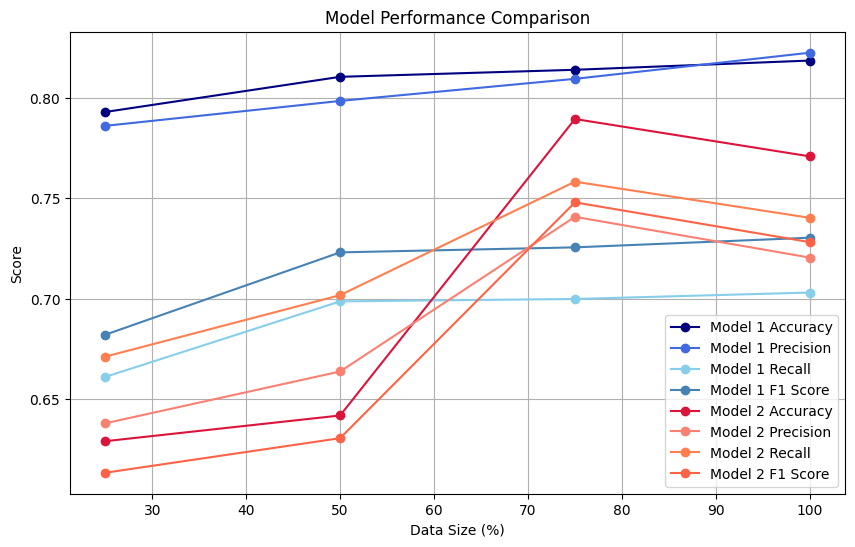

In [140]:
import matplotlib.pyplot as plt

# Define the data sizes as percentages of the dataset
data_sizes = [25, 50, 75, 100]

# Model 1 performance metrics
model1_accuracy = [0.7930, 0.8105, 0.8140, 0.8186]
model1_precision = [0.7861, 0.7985, 0.8095, 0.8225]
model1_recall = [0.6611, 0.6987, 0.6999, 0.7031]
model1_f1 = [0.6821, 0.7231, 0.7256, 0.7304]

# Model 2 performance metrics
model2_accuracy = [0.6291, 0.6419, 0.7895, 0.7709]
model2_precision = [0.6380, 0.6638, 0.7408, 0.7205]
model2_recall = [0.6712, 0.7018, 0.7583, 0.7403]
model2_f1 = [0.6134, 0.6306, 0.7480, 0.7282]

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot the performance metrics for Model 1
plt.plot(data_sizes, model1_accuracy, marker='o', color='navy', label='Model 1 Accuracy')
plt.plot(data_sizes, model1_precision, marker='o', color='royalblue', label='Model 1 Precision')
plt.plot(data_sizes, model1_recall, marker='o', color='skyblue', label='Model 1 Recall')
plt.plot(data_sizes, model1_f1, marker='o', color='steelblue', label='Model 1 F1 Score')

# Plot the performance metrics for Model 2
plt.plot(data_sizes, model2_accuracy, marker='o', color='crimson', label='Model 2 Accuracy')
plt.plot(data_sizes, model2_precision, marker='o', color='salmon', label='Model 2 Precision')
plt.plot(data_sizes, model2_recall, marker='o', color='coral', label='Model 2 Recall')
plt.plot(data_sizes, model2_f1, marker='o', color='tomato', label='Model 2 F1 Score')

# Label the x-axis and y-axis
plt.xlabel('Data Size (%)')
plt.ylabel('Score')

# Add a title to the plot
plt.title('Model Performance Comparison')

# Display a legend for the plot
plt.legend()

# Add grid lines to the plot
plt.grid()

# Show the plot
plt.show()


### 5 Examples 

In [141]:
def compute_performance2(y_true, y_pred):
    """
    Prints different performance metrics like accuracy, recall (macro), precision (macro), and F1 (macro).
    Displays the confusion matrix with proper X & Y axis labels.
    Returns the F1 score.

    Args:
        y_true: Numpy array or list containing true labels.
        y_pred: Numpy array or list containing predicted labels.

    Returns:
        float: The F1 score.
    """
    # Compute performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    # Print performance metrics
    #print(y_true, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 score: {f1:.4f}')

    # Compute and display the confusion matrix
    labels = sorted(list(set(y_true)))
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    print('\nConfusion matrix:')
    print('\t' + '\t'.join(labels))
    for i, label1 in enumerate(labels):
        row = cm[i]
        print(f'{label1}\t' + '\t'.join(str(x) for x in row))

    return f1, accuracy, precision, recall


In [142]:
import os
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming you have the preprocess_tweets function implemented
# You should also have the compute_performance function implemented

def test_method1(test_data, model_base_dir, train_size):
   
    # Construct the model directory path based on the train_size
    model_dir = os.path.join(model_base_dir, str(train_size))
    model_file = os.path.join(model_dir, 'svm_unigrams.pkl')

    # Check if the model file exists
    if not os.path.exists(model_file):
        raise FileNotFoundError(f"Model file not found: {model_file}")

    # Load the saved Random Forest model
    with open(model_file, 'rb') as f:
        rf = pickle.load(f)

    # Load the saved TfidfVectorizer
    vectorizer_file = os.path.join(model_dir, 'vectorizer.pkl')
    with open(vectorizer_file, 'rb') as f:
        vectorizer = pickle.load(f)

    # Convert the text data into numerical features
    X_test = vectorizer.transform(test_df['tweet'])
    y_test = test_df['label']

    # Evaluate the Random Forest model
    y_pred = rf.predict(X_test)

    compute_performance(y_test,y_pred)

In [143]:
test_data

{'id': 27014,
 'tweet': '#ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.',
 'label': 'NOT'}

In [148]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def test_method2_manual(test_data, model_base_dir, train_size):
   
    # Construct the model directory path based on the train_size
    model_dir = os.path.join(model_base_dir, str(train_size))
    model_file = os.path.join(model_dir, 'fasttext_cnn.h5')

    # Check if the model file exists
    if not os.path.exists(model_file):
        raise FileNotFoundError(f"Model file not found: {model_file}")

    # Load the saved CNN model
    cnn = tf.keras.models.load_model(model_file)

    # Load the saved Tokenizer
    tokenizer_file = os.path.join(model_dir, 'tokenizer.pkl')
    with open(tokenizer_file, 'rb') as f:
        tokenizer = pickle.load(f)

    # Convert the text data into numerical features
    X_test = tokenizer.texts_to_sequences(test_df['tweet'])
    X_test = pad_sequences(X_test, maxlen=300, padding='post', truncating='post')
    y_test = test_df['label']

    # Evaluate the CNN model
    y_pred = cnn.predict(X_test)
    y_pred = [1 if x>0.5 else 0 for x in y_pred]

    # Convert the true labels to integers
    y_test = y_test.apply(lambda x: 1 if x == 'OFF' else 0)
    
    compute_performance(y_test, y_pred)


In [145]:
pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Example 1**


In [149]:
# allocating the id, tweet and label to test on both models for the example
test_data = {
    'id': 27014,
    'tweet': '#ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.',
    'label': 'NOT'
}
model_1 = '/content/gdrive/MyDrive/CE807/Assignment2/2213409/models/1'
model_2 = '/content/gdrive/MyDrive/CE807/Assignment2/2213409/models/2'

print("Example 1")
# Calling my test_method1 function for each training size
for train_size in [25, 50, 75, 100]:
    print(f"Testing model trained on {train_size}% data")
    print('model1:')
    test_method1(test_data, model_1, train_size)
    print('model2:')
    test_method2(test_data, model_2, train_size)

Example 1
Testing model trained on 25% data
model1:
Accuracy: 0.7930
Precision: 0.7861
Recall: 0.6611
F1 score: 0.6821

Confusion matrix:
	NOT	OFF
NOT	595	25
OFF	153	87
model2:
27/27 [==============================] - 0s 6ms/step
Accuracy: 0.3198
Precision: 0.5406
Recall: 0.5129
F1 score: 0.2882

Confusion matrix:
Unable to compute confusion matrix.
Testing model trained on 50% data
model1:
Accuracy: 0.8105
Precision: 0.7985
Recall: 0.6987
F1 score: 0.7231

Confusion matrix:
	NOT	OFF
NOT	590	30
OFF	133	107
model2:
27/27 [==============================] - 0s 6ms/step
Accuracy: 0.2895
Precision: 0.5953
Recall: 0.5060
F1 score: 0.2353

Confusion matrix:
Unable to compute confusion matrix.
Testing model trained on 75% data
model1:
Accuracy: 0.8140
Precision: 0.8095
Recall: 0.6999
F1 score: 0.7256

Confusion matrix:
	NOT	OFF
NOT	594	26
OFF	134	106
model2:
27/27 [==============================] - 0s 6ms/step
Accuracy: 0.2849
Precision: 0.5687
Recall: 0.5028
F1 score: 0.2282

Confusion matrix

**Example 2**

In [150]:
# allocating the id, tweet and label to test on both models for the example
test_data = {
    'id': 12588,
    'tweet': '@USER Nigga ware da hits at',
    'label': 'OFF'
}
model_1 = '/content/gdrive/MyDrive/CE807/Assignment2/2213409/models/1'
model_2 = '/content/gdrive/MyDrive/CE807/Assignment2/2213409/models/2'

print("Example 2")
# Calling my test_method1 function for each training size
for train_size in [25, 50, 75, 100]:
    print(f"Testing model trained on {train_size}% data")
    print('model1:')
    test_method1(test_data, model_1, train_size)
    print('model2:')
    test_method2(test_data, model_2, train_size)

Example 2
Testing model trained on 25% data
model1:
Accuracy: 0.7930
Precision: 0.7861
Recall: 0.6611
F1 score: 0.6821

Confusion matrix:
	NOT	OFF
NOT	595	25
OFF	153	87
model2:
27/27 [==============================] - 0s 7ms/step
Accuracy: 0.3198
Precision: 0.5406
Recall: 0.5129
F1 score: 0.2882

Confusion matrix:
Unable to compute confusion matrix.
Testing model trained on 50% data
model1:
Accuracy: 0.8105
Precision: 0.7985
Recall: 0.6987
F1 score: 0.7231

Confusion matrix:
	NOT	OFF
NOT	590	30
OFF	133	107
model2:
27/27 [==============================] - 0s 6ms/step
Accuracy: 0.2895
Precision: 0.5953
Recall: 0.5060
F1 score: 0.2353

Confusion matrix:
Unable to compute confusion matrix.
Testing model trained on 75% data
model1:
Accuracy: 0.8140
Precision: 0.8095
Recall: 0.6999
F1 score: 0.7256

Confusion matrix:
	NOT	OFF
NOT	594	26
OFF	134	106
model2:
27/27 [==============================] - 0s 10ms/step
Accuracy: 0.2849
Precision: 0.5687
Recall: 0.5028
F1 score: 0.2282

Confusion matri

**Example 3**

In [151]:
# allocating the id, tweet and label to test on both models for the example
test_data = {
    'id': 15938,
    'tweet': 'Always smack URL',
    'label': 'NOT'
}
model_base_dir1 = '/content/gdrive/MyDrive/CE807/Assignment2/2213409/models/1'
model_base_dir2 = '/content/gdrive/MyDrive/CE807/Assignment2/2213409/models/2'

print("Example 2")
# Calling my test_method1 function for each training size
for train_size in [25, 50, 75, 100]:
    print(f"Testing model trained on {train_size}% data")
    print('model1:')
    test_method1(test_data, model_1, train_size)
    print('model2:')
    test_method2(test_data, model_2, train_size)

Example 2
Testing model trained on 25% data
model1:
Accuracy: 0.7930
Precision: 0.7861
Recall: 0.6611
F1 score: 0.6821

Confusion matrix:
	NOT	OFF
NOT	595	25
OFF	153	87
model2:
27/27 [==============================] - 0s 7ms/step
Accuracy: 0.3198
Precision: 0.5406
Recall: 0.5129
F1 score: 0.2882

Confusion matrix:
Unable to compute confusion matrix.
Testing model trained on 50% data
model1:
Accuracy: 0.8105
Precision: 0.7985
Recall: 0.6987
F1 score: 0.7231

Confusion matrix:
	NOT	OFF
NOT	590	30
OFF	133	107
model2:
27/27 [==============================] - 0s 6ms/step
Accuracy: 0.2895
Precision: 0.5953
Recall: 0.5060
F1 score: 0.2353

Confusion matrix:
Unable to compute confusion matrix.
Testing model trained on 75% data
model1:
Accuracy: 0.8140
Precision: 0.8095
Recall: 0.6999
F1 score: 0.7256

Confusion matrix:
	NOT	OFF
NOT	594	26
OFF	134	106
model2:
27/27 [==============================] - 0s 6ms/step
Accuracy: 0.2849
Precision: 0.5687
Recall: 0.5028
F1 score: 0.2282

Confusion matrix

**Example 4**

In [ ]:
# allocating the id, tweet and label to test on both models for the example
test_data = {
    'id': 70569,
    'tweet': '......bitch what URL',
    'label': 'OFF'
}
model_1 = '/content/gdrive/MyDrive/CE807/Assignment2/2213409/models/1'
model_2 = '/content/gdrive/MyDrive/CE807/Assignment2/2213409/models/2'

print("Example 2")
# Calling my test_method1 function for each training size
for train_size in [25, 50, 75, 100]:
    print(f"Testing model trained on {train_size}% data")
    print('model1:')
    test_method1(test_data, model_1, train_size)
    print('model2:')
    test_method2(test_data, model_2, train_size)

**Example 5**

In [ ]:
# allocating the id, tweet and label to test on both models for the example
test_data = {
    'id': 51628,
    'tweet': '#Conservatives @USER - You\'re  a clown!  URL',
    'label': 'OFF'
}
model_1 = '/content/gdrive/MyDrive/CE807/Assignment2/2213409/models/1'
model_2 = '/content/gdrive/MyDrive/CE807/Assignment2/2213409/models/2'

print("Example 2")
# Calling my test_method1 function for each training size
for train_size in [25, 50, 75, 100]:
    print(f"Testing model trained on {train_size}% data")
    print('model1:')
    test_method1(test_data, model_1, train_size)
    print('model2:')
    test_method2(test_data, model_2, train_size)